In [1]:
import pandas as pd
import database as db
import betSim as bs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
df_testing = pd.read_sql_query('SELECT * FROM games WHERE tournamentID = 1', db.engine)


In [6]:
all_keys = ['banList','isFirstOfMatch','isLastOfMatch','isSecondOfMatch','isNotFirstOfMatch','AvgTotalKillsLessThan']
all_bet_types = ['kills','dragons','barons','tower','gameTime']
keys = []
betTypes = ['dragons']
df_top10, count = bs.bestKeysSim(df_testing, keys,betTypes)
print(f'number of sims done: {str(count)}')

number of sims done: 4


In [7]:
bs.printSim(df_top10,0)


outcome: 
units: 186.5
wins: 199
loses: 13
total bets: 212
winrate: 0.94
choice: over
key set: []
exclude list: []


In [4]:
df_top10

,units,wins,loses,totalbets,winrate,unitsovertime,banList,KeySet,betType,choice
0,252.17,199,13,212,0.94,"[100.0, 100.83, 101.66, 100.66, 101.49, 102.32...",[],[],dragons,over
1,0.64,8,106,114,0.07,"[100.0, 99.0, 98.0, 98.83, 97.83, 96.83, 95.83...",[],[],dragons,under


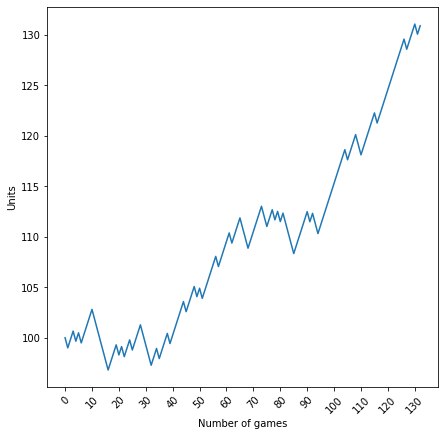

In [6]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.plot(bestunitsovertime)
ax.set_xlabel('Number of games')
ax.set_ylabel('Units')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='x', rotation=45)

In [8]:
#make all the different dfs for different conditions
df_firstOfMatch = pd.read_sql_query('SELECT * FROM games WHERE tournamentID = 1 and Num_in_Match = 1', db.engine)
df_avg = df_firstOfMatch[:5]
df_avg

,gameID,matchID,tournamentID,matchName,tournament_name,region,Num_in_Match,Blue_Team_Name,Red_Team_Name,Date,...,First_tower_time,First_dragon_team,First_dragon_time,First_rift_herald_team,First_rift_herald_time,First_baron_team,First_baron_time,Game_time,Blue_players,Red_players
0,11322,11322,1,DRX vs LSB,LCK_Spring_2022,LCK,1,DRX,Liiv SANDBOX,2022-01-12,...,673,blue,516,blue,516,red,1590,2195,"kingen,Pyosik,Zeka,Deft,BeryL,","Dove,Croco,Clozer,Envyy,Kael,"
1,31322,21322,1,T1 vs KDF,LCK_Spring_2022,LCK,1,T1,Kwangdong Freecs,2022-01-12,...,922,blue,366,blue,526,blue,1985,2232,"Zeus,Oner,Faker,Gumayusi,Keria,","Kiin,Ellim,FATE,Teddy,Hoit,"
2,51322,31322,1,HLE vs NS,LCK_Spring_2022,LCK,1,Nongshim RedForce,Hanwha Life eSports,2022-01-13,...,861,blue,466,blue,512,blue,1674,2152,"Canna,Dread,Bdd,Ghost,Effort,","DuDu,OnFleek,Karis,SamD,Vsta,"
3,81322,41322,1,KT Rolster vs DWG KIA,LCK_Spring_2022,LCK,1,KT Rolster,DWG KIA,2022-01-13,...,897,red,592,blue,644,blue,2050,2568,"Rascal,Cuzz,Aria,Aiming,Life,","Hoya,Canyon,ShowMaker,deokdam,Kellin,"
4,101322,51322,1,GEN vs DRX,LCK_Spring_2022,LCK,1,DRX,Gen.G eSports,2022-01-14,...,935,red,192,red,512,red,1545,1777,"kingen,Pyosik,Zeka,Deft,BeryL,","Doran,Peanut,Chovy,Ruler,Lehends,"


In [17]:
df_numbers = pd.read_sql_query('SELECT * FROM tournaments', db.engine)
df_numbers

,tournamentID,tournament_name,year,region
0,1,LCK_Spring_2022,2022,LCK
1,2,LCK_Spring_Playoffs_2022,2022,LCK
2,3,LPL_Spring_2022,2022,LPL
3,4,LPL_Spring_Playoffs_2022,2022,LPL
4,5,LEC_Spring_2022,2022,LEC
5,6,LEC_Spring_Playoffs_2022,2022,LEC
6,7,LCS_Spring_2022,2022,LCS
7,8,LCS_Spring_Playoffs_2022,2022,LCS
8,9,MSI_2022,2022,MSI
9,10,LCK_Summer_2022,2022,LCK


Text(0, 0.5, 'Total Dragons')

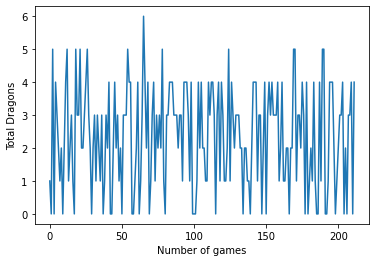

In [2]:
#plot total dragons in df_testing
plt.plot(df_testing['Total_dragons'])
plt.xlabel('Number of games')
plt.ylabel('Total Dragons')
